In [4]:
from pybedtools import Interval

In [5]:
from bpnet.preproc import resize_interval

Using TensorFlow backend.


2021-08-10 16:04:19,562 [WARNING] From /share/quonlab/workspaces/ricsharma/miniconda3/envs/my_bpnet/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [10]:
from copy import deepcopy

In [16]:
from genomelake.extractors import BigwigExtractor

In [65]:
interval = Interval("chr1",16056739, 16058399)
seq_width = 10000

In [66]:
files = ['/share/quonlab/workspaces/ricsharma/all_tracks/bigwig/Methyl.bw',
                                            '/share/quonlab/workspaces/ricsharma/all_tracks/bigwig/NT2_RNAseq_rep1.bw',
                                            '/share/quonlab/workspaces/ricsharma/all_tracks/bigwig/NT2_RNAseq_rep2.bw',
                                            '/share/quonlab/workspaces/ricsharma/data/bpp_100_f.bw',
                                            '/share/quonlab/workspaces/ricsharma/data/bpp_100_r.bw',
                                            '/share/quonlab/workspaces/ricsharma/data/bpp_250_f.bw',
                                            '/share/quonlab/workspaces/ricsharma/data/bpp_250_r.bw',
                                            '/share/quonlab/workspaces/ricsharma/data/bpp_500_f.bw',
                                            '/share/quonlab/workspaces/ricsharma/data/bpp_500_r.bw',
                                            '/share/quonlab/workspaces/ricsharma/all_tracks/bigwig/100_neg_gc_skew.bw',
                                            '/share/quonlab/workspaces/ricsharma/all_tracks/bigwig/25_neg_purine_skew.bw',
                                            '/share/quonlab/workspaces/ricsharma/all_tracks/bigwig/gc_content_25.bw',
                                            '/share/quonlab/workspaces/ricsharma/all_tracks/bigwig/gc_skew_50.bw',
                                            '/share/quonlab/workspaces/ricsharma/all_tracks/bigwig/100_neg_purine_skew.bw',
                                            '/share/quonlab/workspaces/ricsharma/all_tracks/bigwig/50_neg_gc_skew.bw',
                                            '/share/quonlab/workspaces/ricsharma/all_tracks/bigwig/gc_content_50.bw',
                                            '/share/quonlab/workspaces/ricsharma/all_tracks/bigwig/GeneAnnotations_neg.bw',
                                            '/share/quonlab/workspaces/ricsharma/all_tracks/bigwig/purine_skew_100.bw',
                                            '/share/quonlab/workspaces/ricsharma/all_tracks/bigwig/250_neg_gc_skew.bw',
                                            '/share/quonlab/workspaces/ricsharma/all_tracks/bigwig/50_neg_purine_skew.bw',
                                            '/share/quonlab/workspaces/ricsharma/all_tracks/bigwig/gc_skew_100.bw',
                                            '/share/quonlab/workspaces/ricsharma/all_tracks/bigwig/GeneAnnotations_pos.bw',
                                            '/share/quonlab/workspaces/ricsharma/all_tracks/bigwig/purine_skew_250.bw',
                                            '/share/quonlab/workspaces/ricsharma/all_tracks/bigwig/250_neg_purine_skew.bw',
                                            '/share/quonlab/workspaces/ricsharma/all_tracks/bigwig/gc_content_100.bw',
                                            '/share/quonlab/workspaces/ricsharma/all_tracks/bigwig/gc_skew_250.bw',
                                            '/share/quonlab/workspaces/ricsharma/all_tracks/bigwig/purine_skew_25.bw',
                                            '/share/quonlab/workspaces/ricsharma/all_tracks/bigwig/25_neg_gc_skew.bw',
                                            '/share/quonlab/workspaces/ricsharma/all_tracks/bigwig/gc_content_250.bw',
                                            '/share/quonlab/workspaces/ricsharma/all_tracks/bigwig/gc_skew_25.bw',
                                            '/share/quonlab/workspaces/ricsharma/all_tracks/bigwig/purine_skew_50.bw']

In [67]:
test_file = files[0]

In [68]:
rows = []
for file in files:
    seq_interval = resize_interval(deepcopy(interval), seq_width)
    channel = BigwigExtractor(file)
    rows += [channel([seq_interval])[0]]

In [69]:
len(rows)

31

In [70]:
import numpy as np
# Function to normalize specific column in a minibatch
def normalize(row):
    #print(len(row))
    mean = np.mean(row, axis=0)
    var = np.var(row, axis=0)
    row = np.subtract(row, mean)
    return np.divide(row, np.sqrt(var) + 1e-6)

In [71]:
def get_substr(string):
    return string[string.rindex('/')+1:]

/share/quonlab/workspaces/ricsharma/miniconda3/envs/my_bpnet/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/share/quonlab/workspaces/ricsharma/miniconda3/envs/my_bpnet/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/share/quonlab/workspaces/ricsharma/miniconda3/envs/my_bpnet/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a fu

/share/quonlab/workspaces/ricsharma/miniconda3/envs/my_bpnet/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/share/quonlab/workspaces/ricsharma/miniconda3/envs/my_bpnet/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/share/quonlab/workspaces/ricsharma/miniconda3/envs/my_bpnet/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated

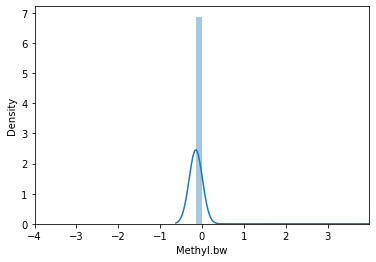

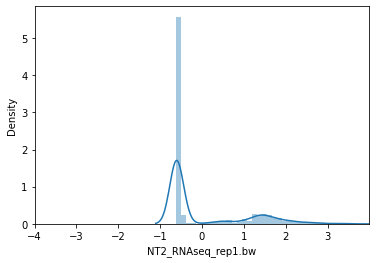

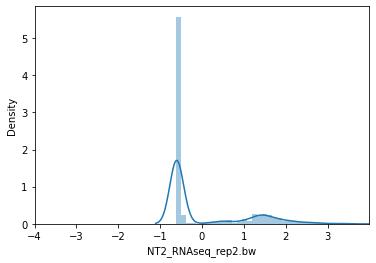

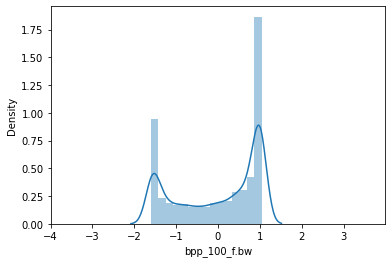

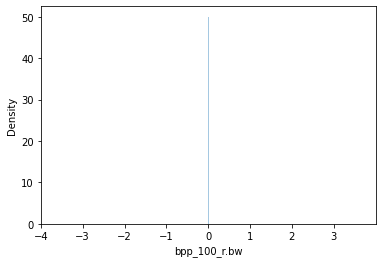

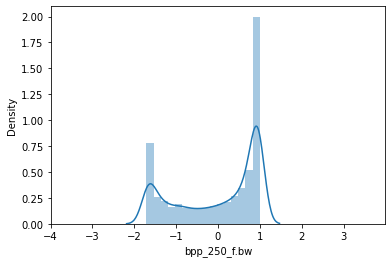

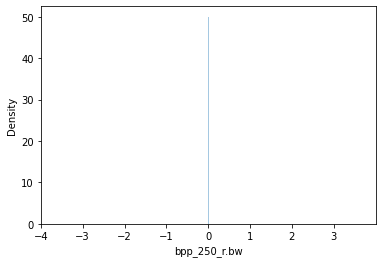

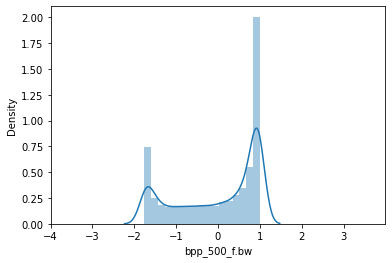

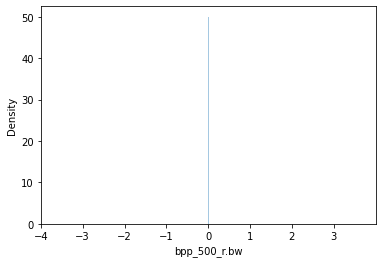

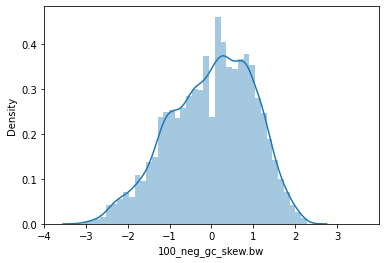

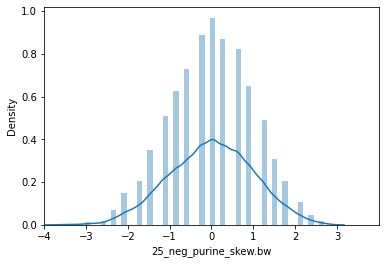

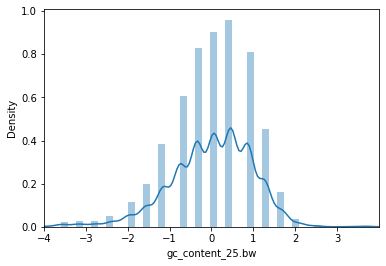

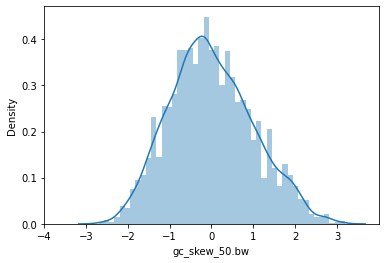

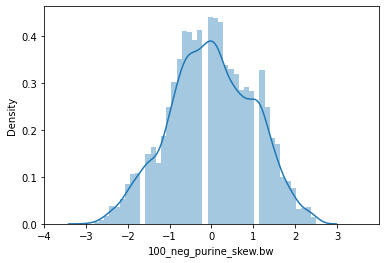

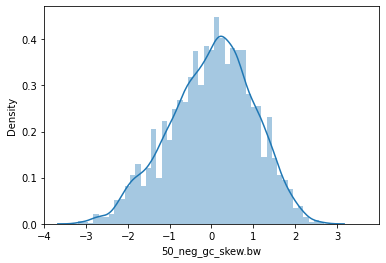

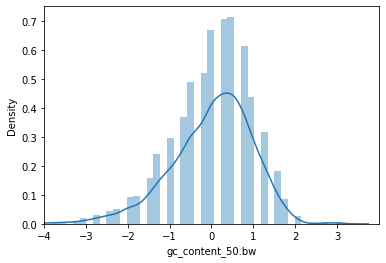

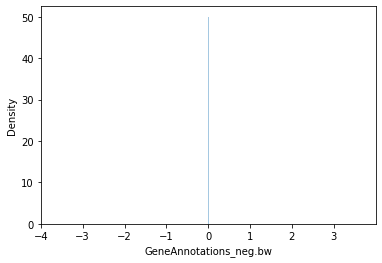

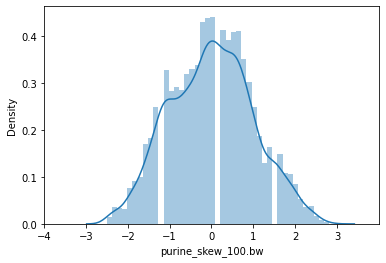

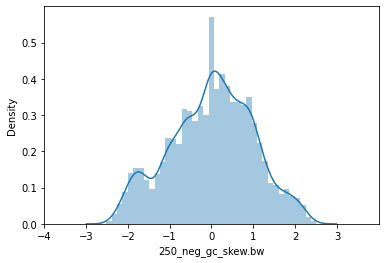

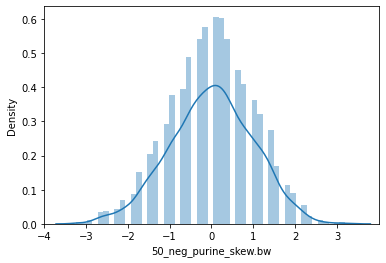

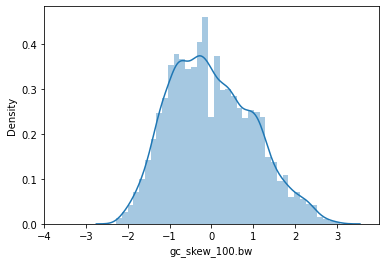

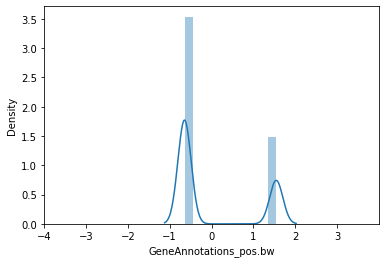

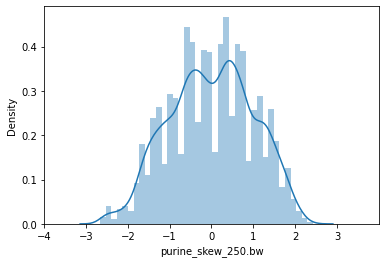

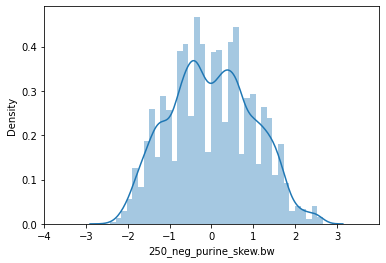

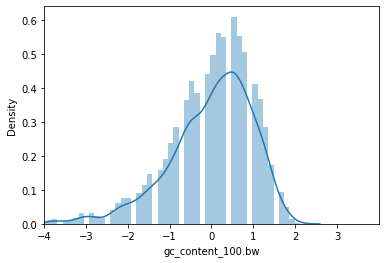

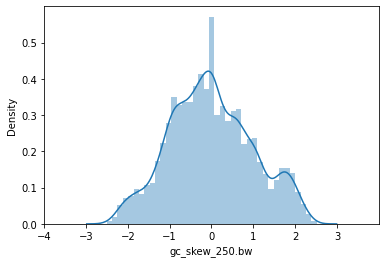

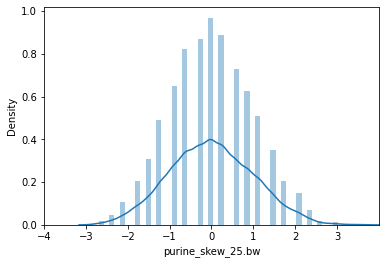

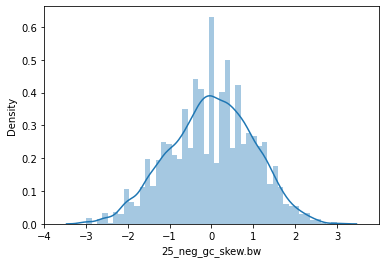

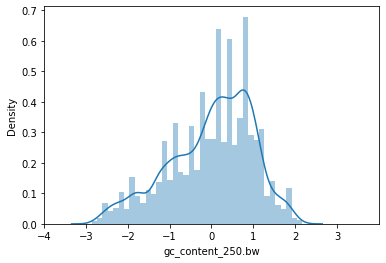

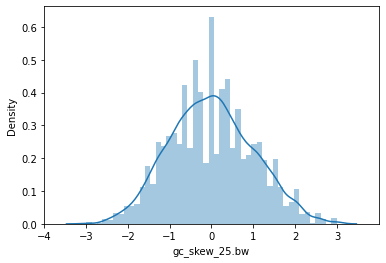

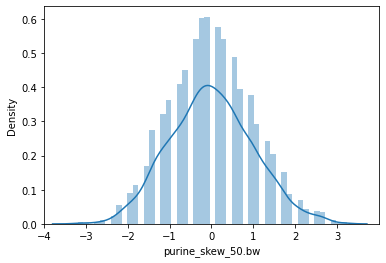

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

low = -4
high = 4

for ind in range(len(rows)):
    #print(rows[ind])
    normalized_col = normalize(rows[ind])
    _, ax = plt.subplots()
    ax.set_xlim(low, high)
    ax.set_xticks(range(low, high))
    sns.distplot(normalized_col, axlabel=get_substr(files[ind]), ax=ax, )